In [1]:
from time import time

start = time()

## Regex classifier

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import re


#idea credit https://www.linkedin.com/pulse/regex-one-pattern-rule-them-all-find-bring-darkness-bind-carranza/
class RegexClassifier(BaseEstimator, RegressorMixin):
    """
    Language Classifier using Regular Expressions
    """

    language_regex_dict = {
        'el': r'([\u0370-\u03FF]+)\s?',  # Greek
        'en': r'([a-zA-Z]+)\s?',  # English
    }

    # STATIC INITALIZATION BLOCK
    # pre-compie all expressions to save execution time
    for lang in language_regex_dict.keys():
        language_regex_dict[lang] = re.compile(language_regex_dict[lang])


    def __init__(self, include_greeklish=True):
        """
        Initialize a new :class:`RegexClassifier` instance.

        :param include_greeklish: Optional. If True, include Greeklish in the language identification process.
        """
        self.include_greeklish = include_greeklish

    def predict(self, x):
        preds = []

        for text in x:
            pred = "other"

            if self.include_greeklish and \
                re.search(RegexClassifier.language_regex_dict["el"], text) and \
                re.search(RegexClassifier.language_regex_dict["en"], text):
                    pred = "greeklish"

            for lang_code, regex_pattern in RegexClassifier.language_regex_dict.items():
                match = re.search(regex_pattern, text)
                if match:
                    pred = lang_code
                    break
            preds.append(pred)
        return np.array(preds)
    
    def fit(self, x, y):
        return self

In [3]:
# Example usage
user_input_text = ["‰Ω†Â•ΩÔºå„Åì„Çå„ÅØ„Çµ„É≥„Éó„É´„Åß„Åô„ÄÇÏïàÎÖïÌïòÏÑ∏Ïöî", "this is an english sentence", "Œ¥ŒµŒΩ Œ±ŒΩœÑŒµœáœâ Œ±ŒªŒªŒø"]
detected_language = RegexClassifier().predict(user_input_text)
print(f"Detected Language Code: {detected_language}")

Detected Language Code: ['other' 'en' 'el']


## Defining the Gold Standard


### Greek-English identification dataset

https://aclanthology.org/L06-1229/
https://aclanthology.org/L04-1369/
https://huggingface.co/datasets/papluca/language-identification

In [4]:
import pandas as pd


def dataset_to_pd(dataset_dict: dict) -> pd.DataFrame:
    df_ls = []
    label_array = np.empty(shape=(sum([len(dataset) for dataset in dataset_dict.values()])), dtype=object)
    last_idx = -1

    for label, dataset in dataset_dict.items():
        new_last_idx = len(dataset) + last_idx
        label_array.put(np.arange(last_idx+1, new_last_idx+1, 1), label)
        last_idx = new_last_idx

        df_ls.append(pd.DataFrame(dataset))

    full_df = pd.concat(df_ls, ignore_index=True)
    full_df["set"] = label_array
    full_df.insert(0, "set", full_df.pop("set"))

    return full_df

In [5]:
from datasets import load_dataset


dataset_dict = load_dataset("papluca/language-identification")
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})

In [6]:
lang_df = dataset_to_pd(dataset_dict)
lang_df

set labels                                               text
0      train     pt  os chefes de defesa da est√≥nia, let√≥nia, litu√¢...
1      train     bg  —Ä–∞–∑–º–µ—Ä—ä—Ç –Ω–∞ —Ö–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–Ω–∞—Ç–∞ –º—Ä–µ–∂–∞ –º–æ–∂–µ –¥–∞ –±—ä–¥–µ ...
2      train     zh  ÂæàÂ•ΩÔºå‰ª•Ââç‰ªé‰∏çÂéªËØÑ‰ª∑Ôºå‰∏çÁü•ÈÅìÊµ™Ë¥π‰∫ÜÂ§öÂ∞ëÁßØÂàÜÔºåÁé∞Âú®Áü•ÈÅìÁßØÂàÜÂèØ‰ª•Êç¢Èí±ÔºåÂ∞±Ë¶ÅÂ•ΩÂ•ΩËØÑ‰ª∑‰∫ÜÔºåÂêéÊù•ÊàëÂ∞±Êää...
3      train     th  ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Å‡πà‡∏≤ ‡∏ó‡∏µ‡πà ‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏±‡∏á ‡∏•‡∏≠‡∏á   honeychurch  ...
4      train     ru                             –û–Ω —É–≤–µ–ª–∏—á–∏–ª –¥–∞–≤–ª–µ–Ω–∏–µ .
...      ...    ...                                                ...
89995   test     zh                               Âè≤ÊñôÂæàÂÖÖÂàÜÔºåÂØπÂ≤∏ÁöÑÂæàÂ§öËßÇÁÇπ‰∏éÂ§ßÈôÜËø•ÂºÇÂïä„ÄÇ
89996   test     tr  √ñrneƒüin, te≈ühis Yunanca bir kelimeden alƒ±ndƒ± (...
89997   test     vi  N·∫øu lite/light ch·ªâ ƒë∆°n gi·∫£n l√† m√¥ t·∫£ m·ªôt ƒë·∫∑c t...
89998   test     bg  –ù–∞–ø—Ä–∏–º–µ—Ä, –µ–¥–Ω–∞ —â–∞—Ç—Å–∫–∞ —Å—Ç–æ–ª–∏—Ü–∞, –∫–æ—è—Ç–æ –ø–æ—Å–µ—Ç–∏—Ö–º–µ...
89999   test     pl                   Mam dla ciebie kilka propozycji:

[90000 rows x 3 columns]

In [7]:
en_gr_cond = lang_df.labels.eq("el") | lang_df.labels.eq("en")
en_gr_df = lang_df.loc[en_gr_cond, ["labels", "text"]]
en_gr_df

labels                                               text
18        el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
39        en                    Didnt really seem to work much.
40        el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
49        en  Highly recommend for those who don't like bein...
75        el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
89961     en  It's super cute, really soft. Print is fine bu...
89965     en  One of them worked, the other one didn't. Ther...
89978     en   I only received one out of the three strikers :(
89982     el  ŒüŒπ ŒøœÅŒ≥Œ±ŒΩŒπœÉŒºŒøŒØ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÉŒµ Œ∏Œ≠œÉŒ∑ ŒΩŒ± ŒºŒµœÑœÅŒÆ...
89986     el  Œ§Œø Abeam ŒºŒµ œÑŒ∑ŒΩ Arabella, Œ±œÄŒ≠ŒΩŒ±ŒΩœÑŒπ Œ±œÄœå œÑŒø ŒªŒπŒºŒ¨...

[9000 rows x 2 columns]

In [8]:
others_df = lang_df.loc[~en_gr_cond, ["labels", "text"]]
others_df = others_df.sample(15000)
others_df.labels = "other"
others_df

labels                                               text
9268   other  quizas demasiado caro para lo que es. de momen...
73735  other           De persoon begint een vuurtje te stoken.
56801  other  Desastroso,No coincid√≠a con el que compr√© y ad...
41683  other                             ÂåÖË£ÖÊòØÂùèÁöÑÔºåËÄå‰∏îÁ¨¨‰∫åÊ¨°ÂèëËøòÊòØÂùèÁöÑÔºåË¢´ÊôíÂæóÂæàÁÉ´
51143  other                                        ‡πÇ‡∏≠‡πÄ‡∏õ‡∏£‡πà‡∏≤ ‡∏à‡∏µ‡∏ô
...      ...                                                ...
60339  other                                     –í–≤–µ–¥–∏—Ç–µ –ï–≤—Ä–æ–ø—É
85950  other  Plus epaisse que les autres housses que j‚Äôai p...
21169  other  T√¥i s·∫Ω ƒÉn n√≥ mi·ªÖn l√† t√¥i kh√¥ng ·ªü quanh ƒë√¢y tro...
64425  other                        Âë®Ê∏∏ ÂìÅÂë≥ ‰∫∫ÁîüÁôæÊÄÅ Áæ°ÊÖïÂ•≥Â≠©ÂèØ‰ª•‰Ωì‰ºö‰∏ÄÁßç‰∏ç‰∏ÄÊ†∑ÁöÑ‰∫∫Áîü
19515  other  ‡§π‡§æ‡§Å ‡§Ü‡§™‡§ï‡•ã ‡§â‡§®‡§Æ‡•á‡§Ç ‡§∏‡•á ‡§è‡§ï ‡§ê‡§∏‡§æ ‡§ï‡§∞‡§®‡§æ ‡§π‡•à , ‡§ú‡§ø‡§∏‡•á ‡§Ü‡§™ ‡§ú‡§æ‡§®...

[15000 rows x 2 columns]

In [9]:
gold1_df = pd.concat([en_gr_df, others_df], axis=0, ignore_index=True, copy=False)
gold1_df

labels                                               text
0         el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1         en                    Didnt really seem to work much.
2         el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3         en  Highly recommend for those who don't like bein...
4         el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
23995  other                                     –í–≤–µ–¥–∏—Ç–µ –ï–≤—Ä–æ–ø—É
23996  other  Plus epaisse que les autres housses que j‚Äôai p...
23997  other  T√¥i s·∫Ω ƒÉn n√≥ mi·ªÖn l√† t√¥i kh√¥ng ·ªü quanh ƒë√¢y tro...
23998  other                        Âë®Ê∏∏ ÂìÅÂë≥ ‰∫∫ÁîüÁôæÊÄÅ Áæ°ÊÖïÂ•≥Â≠©ÂèØ‰ª•‰Ωì‰ºö‰∏ÄÁßç‰∏ç‰∏ÄÊ†∑ÁöÑ‰∫∫Áîü
23999  other  ‡§π‡§æ‡§Å ‡§Ü‡§™‡§ï‡•ã ‡§â‡§®‡§Æ‡•á‡§Ç ‡§∏‡•á ‡§è‡§ï ‡§ê‡§∏‡§æ ‡§ï‡§∞‡§®‡§æ ‡§π‡•à , ‡§ú‡§ø‡§∏‡•á ‡§Ü‡§™ ‡§ú‡§æ‡§®...

[24000 rows x 2 columns]

### Greek-Greeklish identification dataset

In [10]:
head_url = "https://forum.warmane.com"
warmane_url = "https://forum.warmane.com/forumdisplay.php?f=20"

In [11]:
from src.crawling import fetch_soup
from tasks.warmane import parse_warmane_thread
from tqdm import tqdm


threads = []

for page in range(1, 9):
    url = warmane_url + f"&page={page}"
    soup = fetch_soup(url)

    print(f"Processing page {page} of 8...")
    thread_tags = soup.find_all("li", {"class": "threadbit"})
    for thread_tag in tqdm(thread_tags):
        thread = parse_warmane_thread(head_url, thread_tag)
        threads.append(thread)

Processing page 1 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:04<00:00,  4.30it/s]


Processing page 2 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.70it/s]


Processing page 3 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.49it/s]


Processing page 4 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.26it/s]


Processing page 5 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.22it/s]


Processing page 6 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.32it/s]


Processing page 7 of 8...


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                            | 13/20 [00:02<00:01,  4.78it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=272585


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:04<00:00,  4.98it/s]


Processing page 8 of 8...


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                               | 5/8 [00:00<00:00,  5.23it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=278731


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:02<00:00,  2.85it/s]


In [12]:
import itertools

# flatten nested lists 
posts = set(itertools.chain.from_iterable([thread.posts for thread in threads]))
len(posts)

414

In [13]:
import pandas as pd

warmane_df = pd.DataFrame.from_records([post.__dict__ for post in posts], index="id")
warmane_df.reply_to = warmane_df.reply_to.fillna(-1).astype(int)
warmane_df

thread_id           author  \
id                                    
2926596     384475           Ripsin   
2473988     300013           v4gflo   
2420747     290921          AlexPan   
2981903     399822  xAchillesGate4x   
2879517     371804            Csdas   
...            ...              ...   
2877428     353812        Shiverbro   
3069941     423611  crystallenia898   
2801654     350071      Draculation   
2873339     370241           Ripsin   
2410495     289030          boolouk   

                                                  contents       date  \
id                                                                      
2926596  Kalhspera paides,\n\r\nEimai arketo kairo ston... 2018-05-22   
2473988  geia sas.psaxnw ellhniko guild ston Deathwing ... 2015-06-17   
2420747  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \... 2015-03-24   
2981903  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin... 2019-03-03   
2879517  Opoios gnwrizei kati as mou kanei /w Dremoria ... 2017-11-29   
...                                                    ...        ...   
2877428       kalos private aksizei na ksekiniseis paidia? 2017-11-21   
3069941  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº... 2020-07-26   
2801654                                   Bump! ICC25 6/12 2017-05-07   
2873339  Kalhspera tha ithela na rwthsw an kapoios gnwr... 2017-11-07   
2410495  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ... 2015-03-13   

         reply_to  
id                 
2926596        -1  
2473988        -1  
2420747        -1  
2981903        -1  
2879517        -1  
...           ...  
2877428   2875915  
3069941   3068345  
2801654   2795443  
2873339        -1  
2410495   2409274  

[414 rows x 5 columns]

In [14]:
empty_contents = warmane_df.contents.apply(lambda x: x.isspace() | len(x)==0)
warmane_df[empty_contents]

thread_id     author contents       date  reply_to
id                                                         
3082464     427259  malakas17          2020-10-20   3081822
3113236     427259  malakas17          2021-05-12   3113009
3099161     431660  malakas17          2021-02-10   3096432
3113819     427259  malakas17          2021-05-16   3113236
3099593     427259    boonick          2021-02-14   3093400
3081820     427259  malakas17          2020-10-16   3080427
3081822     427259  malakas17          2020-10-16   3081820

In [15]:
warmane_df = warmane_df[~empty_contents]

In [16]:
regex_model = RegexClassifier(include_greeklish=False)
preds = regex_model.predict(warmane_df.contents)

In [17]:
warmane_df[preds=="en"].contents

id
2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
2959390               Bubblethesap Icecrown wotlk horde belf
2947119    den se vrisko kane add evvi  .\nmou leei den u...
                                 ...                        
2557881                          Paokara einai padou file :P
2602989    Me to plevro ton Allience ayti ti fora Oi <<An...
2877428         kalos private aksizei na ksekiniseis paidia?
2801654                                     Bump! ICC25 6/12
2873339    Kalhspera tha ithela na rwthsw an kapoios gnwr...
Name: contents, Length: 227, dtype: object

In [18]:
warmane_df[preds=="greeklish"].contents

Series([], Name: contents, dtype: object)

In [19]:
warmane_df[preds=="el"].contents

id
2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2959391    ŒöŒ±ŒªŒ∑œÉœÄŒµœÅŒ± Œ∏Œ± œÄŒ±œÇ œÉœÑŒπœÇ ŒπŒ¥ŒπœåœÑŒ∑œÑŒµœÇ (properties) œÉ...
2719776    Originally Posted by celphecil\n\nŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± Œ£œâ...
2971700    ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œø guild , œàŒ±œáŒΩŒøœÖŒºŒµ Œ±œÑŒøŒºŒ± Œ≥ŒπŒ± runs ICC10...
                                 ...                        
2609122    œÄœéœÅœâœÉŒ∑ ŒºŒµ œÑŒ± ŒºŒπœÉŒ¨ Dung, Quests Œ∫Œ±Œπ Raids bugge...
2707437    ŒõŒøŒπœÄœåŒΩ ŒºŒ±Œ≥ŒµœÇ,ŒæŒ≠œÅŒµŒπ Œ∫Œ¨œÄŒøŒπŒøœÇ Œ≥ŒπŒ±œÑŒØ Œ¥ŒµŒΩ Œ≥ŒØŒΩŒµœÑŒ±Œπ ŒΩ...
2777071    INACTIVE\n\n\n <Northern Defiance>  ŒöŒ±ŒπŒΩŒøœçœÅŒ≥ŒπŒ±...
3069941    Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2410495    ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...
Name: contents, Length: 180, dtype: object

In [20]:
labels = np.where(preds=="en", "greeklish", "el")
gold2_df = pd.DataFrame({"labels": labels, "text": warmane_df.contents})
gold2_df

labels                                               text
id                                                                   
2926596  greeklish  Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988  greeklish  geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517  greeklish  Opoios gnwrizei kati as mou kanei /w Dremoria ...
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[407 rows x 2 columns]

In [21]:
gold_df = pd.concat([gold1_df, gold2_df])
gold_df

labels                                               text
0               el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1               en                    Didnt really seem to work much.
2               el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3               en  Highly recommend for those who don't like bein...
4               el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[24407 rows x 2 columns]

In [22]:
import os


OUTPUT_DIR = "output"

def csv_output(df: pd.DataFrame, filename: str) -> None:
    file = os.path.join(OUTPUT_DIR, filename)
    df.to_csv(file)
    print(f"File saved successfully as {file}")

In [23]:
csv_output(gold_df, "gold.csv")

File saved successfully as output\gold.csv


## Youtube Crawling

In [26]:
from src.crawling import ChromeDriverManager, jupyter_options


ChromeDriverManager.set_options(jupyter_options())

In [27]:
from tasks.youtube import scrape_youtube, extract_search_results, extract_comments


# "greek songs" search in Greek
search_url = "https://www.youtube.com/results?search_query=%CE%B5%CE%BB%CE%BB%CE%B7%CE%BD%CE%B9%CE%BA%CE%B1+%CF%84%CF%81%CE%B1%CE%B3%CE%BF%CF%85%CE%B4%CE%B9%CE%B1"
search_soup = scrape_youtube(ChromeDriverManager.get(), search_url, max_scrolls=10, verbose=True)

Scrolling (0 out of max 10)...
Scrolling (1 out of max 10)...
Scrolling (2 out of max 10)...
Scrolling (3 out of max 10)...
Scrolling (4 out of max 10)...
Scrolling (5 out of max 10)...
Scrolling (6 out of max 10)...
Scrolling (7 out of max 10)...
Scrolling (8 out of max 10)...
Scrolling (9 out of max 10)...
Scrolling (10 out of max 10)...


In [28]:
results = extract_search_results(search_soup)
results_df = pd.DataFrame({"title": results[0], "link": results[1]})
results_df

title  \
0    \n\nŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Mu...   
1    \n\nŒ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒúœÄŒ¨œÉŒ∑œÇ, ŒìŒªœÖŒ∫ŒµœÅŒØŒ±, ŒëŒΩŒ¥œÅŒµŒ¨œÑŒøœÇ, ...   
2    \n\nŒàŒΩœÑŒµœáŒΩŒ± ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Live | ŒìŒªœÖŒ∫Œ≠œÇ Œ†ŒµœÅŒπœÄŒªŒ±ŒΩŒÆœÉŒµ...   
3    \n\nŒ§Œë ŒõŒëŒ™ŒöŒë Œ§ŒóŒ£ Œ§ŒëŒíŒïŒ°ŒùŒëŒ£ | NON STOP MIX - Œ†ŒøœÖ...   
4                      \n\nŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±\n   
..                                                 ...   
178   \n\nŒëŒΩ œÑŒø Encanto ŒµŒØœáŒµ ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±... üé∂\n   
179      \n\nŒ§Œü ŒëŒõŒóŒòŒôŒùŒü ŒîŒôŒëŒßŒ°ŒüŒùŒôŒöŒü ŒïŒõŒõŒóŒùŒôŒöŒü Œ§Œ°ŒëŒìŒüŒ•ŒîŒô\n   
180  \n\nŒöŒøœÖŒ∫ŒøœÖŒ≤Œ¨Œ≥ŒπŒ±-  Œ†Œ±ŒπŒ¥ŒπŒ∫œå Œ§œÅŒ±Œ≥ŒøœÖŒ¥Œ¨Œ∫Œπ  -Greek N...   
181         \n\nŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ pop œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± 80s-90s (mix)\n   
182  \n\nŒöŒ±Œ∂Œ±ŒΩœÑŒ∂ŒØŒ¥Œ∑œÇ, Œ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒöŒøœÖŒºŒπœéœÑŒ∑, Œ£œÑŒ±ŒΩŒØœÉ...   

                                                  link  
0    /watch?v=sTyGh6edBRQ&pp=ygUjzrXOu867zrfOvc65zr...  
1    /watch?v=cOGip_clrKY&pp=ygUjzrXOu867zrfOvc65zr...  
2    /watch?v=nUCZkuwPwGg&pp=ygUjzrXOu867zrfOvc65zr...  
3    /watch?v=C4f3xcZzr3s&pp=ygUjzrXOu867zrfOvc65zr...  
4    /watch?v=UIfND1RykJc&pp=ygUjzrXOu867zrfOvc65zr...  
..                                                 ...  
178                                /shorts/XgChHFHziKc  
179  /watch?v=OtMFMWuQgCo&pp=ygUjzrXOu867zrfOvc65zr...  
180  /watch?v=olq2DyQ_mNU&pp=ygUjzrXOu867zrfOvc65zr...  
181  /watch?v=Kta2v6W6-vQ&pp=ygUjzrXOu867zrfOvc65zr...  
182  /watch?v=O3l1NuTq9Oc&pp=ygUjzrXOu867zrfOvc65zr...  

[183 rows x 2 columns]

In [29]:
results_df.title = results_df.title.apply(lambda x: x.strip())
results_df.link = results_df.link.apply(lambda x: "https://www.youtube.com" + x) 
results_df

title  \
0    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
1    Œ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒúœÄŒ¨œÉŒ∑œÇ, ŒìŒªœÖŒ∫ŒµœÅŒØŒ±, ŒëŒΩŒ¥œÅŒµŒ¨œÑŒøœÇ, ŒúœÄŒ≠Œª...   
2    ŒàŒΩœÑŒµœáŒΩŒ± ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Live | ŒìŒªœÖŒ∫Œ≠œÇ Œ†ŒµœÅŒπœÄŒªŒ±ŒΩŒÆœÉŒµŒπœÇ |...   
3    Œ§Œë ŒõŒëŒ™ŒöŒë Œ§ŒóŒ£ Œ§ŒëŒíŒïŒ°ŒùŒëŒ£ | NON STOP MIX - Œ†ŒøœÖŒªœåœÄŒø...   
4                            ŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±   
..                                                 ...   
178         ŒëŒΩ œÑŒø Encanto ŒµŒØœáŒµ ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±... üé∂   
179            Œ§Œü ŒëŒõŒóŒòŒôŒùŒü ŒîŒôŒëŒßŒ°ŒüŒùŒôŒöŒü ŒïŒõŒõŒóŒùŒôŒöŒü Œ§Œ°ŒëŒìŒüŒ•ŒîŒô   
180  ŒöŒøœÖŒ∫ŒøœÖŒ≤Œ¨Œ≥ŒπŒ±-  Œ†Œ±ŒπŒ¥ŒπŒ∫œå Œ§œÅŒ±Œ≥ŒøœÖŒ¥Œ¨Œ∫Œπ  -Greek Nurse...   
181               ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ pop œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± 80s-90s (mix)   
182  ŒöŒ±Œ∂Œ±ŒΩœÑŒ∂ŒØŒ¥Œ∑œÇ, Œ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒöŒøœÖŒºŒπœéœÑŒ∑, Œ£œÑŒ±ŒΩŒØœÉŒ∑, Œß...   

                                                  link  
0    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
1    https://www.youtube.com/watch?v=cOGip_clrKY&pp...  
2    https://www.youtube.com/watch?v=nUCZkuwPwGg&pp...  
3    https://www.youtube.com/watch?v=C4f3xcZzr3s&pp...  
4    https://www.youtube.com/watch?v=UIfND1RykJc&pp...  
..                                                 ...  
178         https://www.youtube.com/shorts/XgChHFHziKc  
179  https://www.youtube.com/watch?v=OtMFMWuQgCo&pp...  
180  https://www.youtube.com/watch?v=olq2DyQ_mNU&pp...  
181  https://www.youtube.com/watch?v=Kta2v6W6-vQ&pp...  
182  https://www.youtube.com/watch?v=O3l1NuTq9Oc&pp...  

[183 rows x 2 columns]

In [30]:
greeklish_model = RegexClassifier(include_greeklish=True)
preds = greeklish_model.predict(results_df.title)
gr_res_df = results_df[(preds != "en") & (preds != None)]
gr_res_df

title  \
0    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
1    Œ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒúœÄŒ¨œÉŒ∑œÇ, ŒìŒªœÖŒ∫ŒµœÅŒØŒ±, ŒëŒΩŒ¥œÅŒµŒ¨œÑŒøœÇ, ŒúœÄŒ≠Œª...   
2    ŒàŒΩœÑŒµœáŒΩŒ± ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Live | ŒìŒªœÖŒ∫Œ≠œÇ Œ†ŒµœÅŒπœÄŒªŒ±ŒΩŒÆœÉŒµŒπœÇ |...   
3    Œ§Œë ŒõŒëŒ™ŒöŒë Œ§ŒóŒ£ Œ§ŒëŒíŒïŒ°ŒùŒëŒ£ | NON STOP MIX - Œ†ŒøœÖŒªœåœÄŒø...   
4                            ŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±   
..                                                 ...   
178         ŒëŒΩ œÑŒø Encanto ŒµŒØœáŒµ ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±... üé∂   
179            Œ§Œü ŒëŒõŒóŒòŒôŒùŒü ŒîŒôŒëŒßŒ°ŒüŒùŒôŒöŒü ŒïŒõŒõŒóŒùŒôŒöŒü Œ§Œ°ŒëŒìŒüŒ•ŒîŒô   
180  ŒöŒøœÖŒ∫ŒøœÖŒ≤Œ¨Œ≥ŒπŒ±-  Œ†Œ±ŒπŒ¥ŒπŒ∫œå Œ§œÅŒ±Œ≥ŒøœÖŒ¥Œ¨Œ∫Œπ  -Greek Nurse...   
181               ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ pop œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± 80s-90s (mix)   
182  ŒöŒ±Œ∂Œ±ŒΩœÑŒ∂ŒØŒ¥Œ∑œÇ, Œ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒöŒøœÖŒºŒπœéœÑŒ∑, Œ£œÑŒ±ŒΩŒØœÉŒ∑, Œß...   

                                                  link  
0    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
1    https://www.youtube.com/watch?v=cOGip_clrKY&pp...  
2    https://www.youtube.com/watch?v=nUCZkuwPwGg&pp...  
3    https://www.youtube.com/watch?v=C4f3xcZzr3s&pp...  
4    https://www.youtube.com/watch?v=UIfND1RykJc&pp...  
..                                                 ...  
178         https://www.youtube.com/shorts/XgChHFHziKc  
179  https://www.youtube.com/watch?v=OtMFMWuQgCo&pp...  
180  https://www.youtube.com/watch?v=olq2DyQ_mNU&pp...  
181  https://www.youtube.com/watch?v=Kta2v6W6-vQ&pp...  
182  https://www.youtube.com/watch?v=O3l1NuTq9Oc&pp...  

[160 rows x 2 columns]

In [31]:
import bs4
import threading


def scrape_job(yt_url: str) -> tuple[str, bs4.BeautifulSoup]:
    try:
        result = scrape_youtube(ChromeDriverManager.get(), 
                                yt_url, 
                                scroll_wait_secs=2,
                                max_scrolls=15,
                                verbose=False)
    except Exception:
        result = None
    return yt_url, result

In [32]:
import concurrent.futures


jobs = 15
# get at most max_videos, if more videos were crawled during the search
max_videos = 150
urls = gr_res_df.link[:max_videos] if len(gr_res_df) > max_videos else gr_res_df

print("Scrapping comments...")
with concurrent.futures.ThreadPoolExecutor(max_workers=jobs) as executor:
    results = list(tqdm(executor.map(scrape_job, urls), total=len(urls)))

ChromeDriverManager.quit()

Scrapping comments...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [04:17<00:00,  1.72s/it]


In [33]:
from tasks.youtube import extract_comments


scraped_urls = []
comments = []
dates = []

for url, result in results:
    if result is not None:
        new_comments, new_dates = extract_comments(result)
        comments += new_comments
        dates += new_dates
        scraped_urls += ([url] * len(new_comments))

In [34]:
comments_df = pd.DataFrame({"link": scraped_urls, "text": comments, "date": dates})
comments_df

link  \
0    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
1    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
2    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
3    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
4    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
..                                                 ...   
394  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
395  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
396  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
397  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
398  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   

                                                  text  \
0          Super Mix Dankesch√∂n Greetings from Germany   
1    Beautiful music, beautiful language, beautiful...   
2        ŒàŒΩŒ± Œ±œÄ' œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± ŒºŒπŒæ œÄŒøœÖ Œ≠œáœâ Œ±Œ∫ŒøœçœÉŒµŒπ œÄŒøœÑŒ≠!   
3                  ŒùŒ± Œ∫Œ±Œπ ŒµŒΩŒ± œâœÅŒ±ŒπŒø ŒºŒπŒæ!ŒºœÄœÅŒ±Œ≤Œø œÄŒ±ŒπŒ¥ŒπŒ±!   
4                    Œ§Œ± œÄŒπŒø œâœÅŒ±ŒØŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± ŒúœÄœÅŒ¨Œ≤Œø œÉŒ±œÇ   
..                                                 ...   
394                                                  !   
395                                                      
396                                                Yy5   
397                                                96?   
398                                                  O   

                          date  
0   2023-10-25 13:36:45.279617  
1   2022-11-25 13:36:45.284617  
2   2021-11-25 13:36:45.287617  
3   2022-11-25 13:36:45.290718  
4   2022-11-25 13:36:45.293615  
..                         ...  
394 2023-04-25 13:36:47.126211  
395 2023-10-25 13:36:47.130436  
396 2022-11-25 13:36:47.133472  
397 2022-11-25 13:36:47.136469  
398 2023-07-25 13:36:47.140435  

[399 rows x 3 columns]

In [35]:
comments_df.date = comments_df.date.apply(lambda x: x.date() if x is not None else None)

preds = greeklish_model.predict(comments_df.text)
mask = ((preds != "el") & (preds != "greeklish"))
comments_df[mask]

link  \
0    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
1    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
6    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
7    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
10   https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
..                                                 ...   
394  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
395  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
396  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
397  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
398  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   

                                                  text        date  
0          Super Mix Dankesch√∂n Greetings from Germany  2023-10-25  
1    Beautiful music, beautiful language, beautiful...  2022-11-25  
6        Felicidades S√∫per Mix.... Bes√≥s desde Espa√±a   2022-11-25  
7                                   BEUTIFUL love it..  2022-11-25  
10   Thanks for putting timed songs. Easy to find m...  2022-11-25  
..                                                 ...         ...  
394                                                  !  2023-04-25  
395                                                     2023-10-25  
396                                                Yy5  2022-11-25  
397                                                96?  2022-11-25  
398                                                  O  2023-07-25  

[175 rows x 3 columns]

In [36]:
crawl_df = pd.merge(gr_res_df, comments_df[~mask], how="inner", on="link")
crawl_df

title  \
0    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
1    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
2    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
3    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
4    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
..                                                 ...   
251  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
252  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
253  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
254  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
255  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   

                                                  link  \
0    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
1    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
2    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
3    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
4    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...   
..                                                 ...   
251  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
252  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
253  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
254  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
255  https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   

                                                  text        date  
0        ŒàŒΩŒ± Œ±œÄ' œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± ŒºŒπŒæ œÄŒøœÖ Œ≠œáœâ Œ±Œ∫ŒøœçœÉŒµŒπ œÄŒøœÑŒ≠!  2021-11-25  
1                  ŒùŒ± Œ∫Œ±Œπ ŒµŒΩŒ± œâœÅŒ±ŒπŒø ŒºŒπŒæ!ŒºœÄœÅŒ±Œ≤Œø œÄŒ±ŒπŒ¥ŒπŒ±!  2022-11-25  
2                    Œ§Œ± œÄŒπŒø œâœÅŒ±ŒØŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± ŒúœÄœÅŒ¨Œ≤Œø œÉŒ±œÇ  2022-11-25  
3    ŒßœâœÅŒØœÇ œÑŒ∑ ŒºŒøœÖœÉŒπŒ∫ŒÆ Œø Œ∫œåœÉŒºŒøœÇ Œ∏Œ± ŒÆœÑŒ±ŒΩ Œ≥Œ∫œÅŒπ. Œó ŒºŒøœÖœÉ...  2022-11-25  
4    ŒàŒΩŒ± Œ±œÄ' œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± ŒºŒπŒæ œÄŒøœÖ Œ≠œáœâ Œ±Œ∫ŒøœçœÉŒµ.ŒπŒ©œÅŒ±ŒØŒ± ...  2022-11-25  
..                                                 ...         ...  
251  œÑŒø ŒµœáŒµœÑŒµ ŒæŒµœÜœÑŒπŒªŒπœÉŒµŒπ ŒºŒµ œÑŒπœÇ Œ¥ŒπŒ±œÜŒ∑ŒºŒπœÇŒµŒπœÇ ŒºŒøœÖœÉŒπŒ∫Œ∑...  2022-11-25  
252  Œ©œÅŒ±ŒØŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± Œ±ŒªŒªŒ¨ œÄŒøŒªœç Œ¥ŒπŒ±œÜŒÆŒºŒπœÉŒ∑ Œ∫Œ¨Œ∏Œµ œÑœåœÉŒø ...  2022-11-25  
253  ŒåœáŒπ œÑŒø Œ¥ŒπŒ∫œå ŒºŒ±œÇ œÑŒø œáŒ±œäŒ≤Œ¨ŒΩŒπ Œ≠Œ∫Œ±ŒΩŒµ œÄŒ±ŒπœáŒΩŒπŒ¥Œ¨Œ∫ŒπŒ± Œº...  2022-11-25  
254                    ŒöŒ±ŒªŒ¨ ŒøœçœÑŒµ Œ≠ŒΩŒ± œÉœÜŒ±Œ∫ŒπŒ±ŒΩŒ¨Œ∫Œ∑ ŒΩœÑœÅŒøœÄŒÆ  2022-11-25  
255                               ŒîŒµŒΩ ŒµŒØŒΩŒ±Œπ ŒøœÅŒ≥Œ±ŒΩœâŒºŒ≠ŒΩŒø  2023-01-25  

[256 rows x 4 columns]

In [37]:
sum(crawl_df.date == None)

0

In [38]:
csv_output(crawl_df, "crawl.csv")

File saved successfully as output\crawl.csv


## Language Identification

https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he
https://gking.harvard.edu/files/abs/0s-abs.shtml
https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data


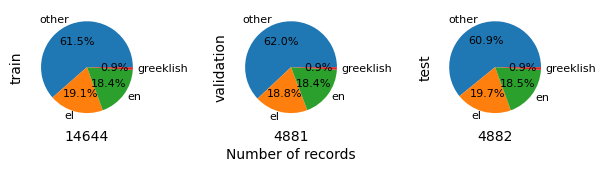

In [41]:
from src.ml import train_test_val_split
import matplotlib.pyplot as plt


data_train, data_val, data_test = train_test_val_split(gold_df, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2,
                                                        random_state=42, stratify_col="labels")
# code block from Ioannis Pavlopoulos
axes = pd.DataFrame({"train": data_train.labels.value_counts(),
              "validation": data_val.labels.value_counts(),
              "test": data_test.labels.value_counts()}
            ).plot.pie(subplots=True, 
                       textprops={'fontsize': 8},
                       autopct=f'%1.1f%%', # print percent% results 
                       legend=False)

axes[0].set_xlabel(data_train.shape[0])
axes[1].set_xlabel(data_val.shape[0])
axes[2].set_xlabel(data_test.shape[0])

axes[1].text(0, -2, 'Number of records', ha='center')

plt.tight_layout(pad=2.0)
plt.show()

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = TfidfVectorizer().fit(data_train.text)
x_train = vectorizer.transform(data_train.text)
y_train = data_train.labels
x_val = vectorizer.transform(data_val.text)
y_val = data_val.labels
x_test = vectorizer.transform(data_test.text)
y_test = data_test.labels

In [43]:
from sklearn.model_selection import cross_val_score


def cross_val_res(model, x, y, scoring=None, cv=10):
    if scoring is None:
        scoring = "f1_macro"
    res = cross_val_score(model, x, y, cv=cv, scoring=scoring)
    return res

### Dummy Classifier

In [44]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings


def get_statistics(y_test, y_pred):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        print(f"Macro F1: {f1_score(y_test, y_pred, average='macro', zero_division=0)}")
        print(classification_report(y_test, y_pred, zero_division=0))
        ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred, 
                                                colorbar=True)
        plt.show()

Macro F1: 0.1891633770533554
              precision    recall  f1-score   support

          el       0.00      0.00      0.00       962
          en       0.00      0.00      0.00       903
   greeklish       0.00      0.00      0.00        46
       other       0.61      1.00      0.76      2971

    accuracy                           0.61      4882
   macro avg       0.15      0.25      0.19      4882
weighted avg       0.37      0.61      0.46      4882



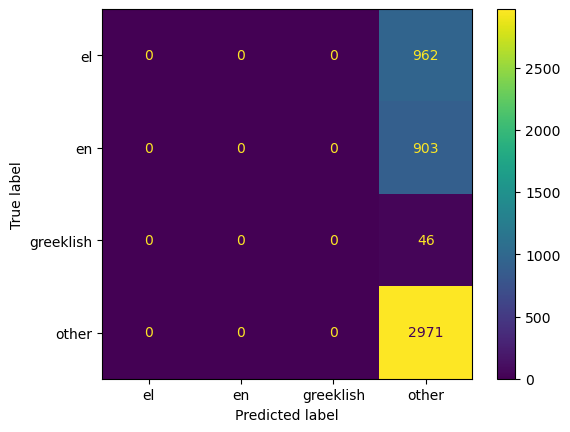

In [45]:
from sklearn.dummy import DummyClassifier, DummyRegressor


majority = DummyClassifier(strategy="most_frequent")
majority.fit(x_train, y_train)
majority_res = majority.predict(x_test)

get_statistics(y_test, majority_res)

### Regex Classification

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    regex_model = RegexClassifier()
    res = cross_val_res(regex_model, data_train.text, y_train, scoring="f1_macro")
    print(f"Regex Classifier mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Regex Classifier mean macro F1: 0.5091, std: 0.5024


Macro F1: 0.5086202972420182
              precision    recall  f1-score   support

          el       1.00      1.00      1.00       962
          en       0.32      1.00      0.49       903
   greeklish       0.00      0.00      0.00        46
       other       1.00      0.38      0.55      2971

    accuracy                           0.61      4882
   macro avg       0.58      0.59      0.51      4882
weighted avg       0.86      0.61      0.62      4882



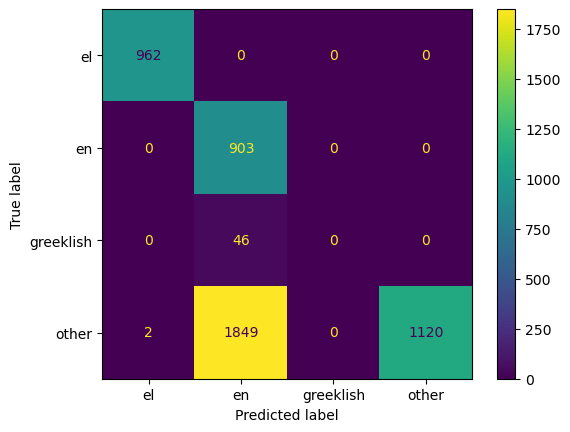

In [47]:
regex_model = RegexClassifier(include_greeklish=True).fit(data_train.text, y_train)
regex_res = regex_model.predict(data_test.text)
get_statistics(y_test, regex_res)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression


with warnings.catch_warnings():
    # ignore warnings about deprecated methods in libraries
    warnings.simplefilter("ignore")

    lr = LogisticRegression(max_iter=1000)
    res = cross_val_res(lr, x_train, y_train)
    print(f"Logistic Regression mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Logistic Regression mean macro F1-score 0.8556, std: 0.8442


Macro F1: 0.8897023117025014
              precision    recall  f1-score   support

          el       1.00      0.94      0.97       962
          en       1.00      0.97      0.98       903
   greeklish       1.00      0.46      0.63        46
       other       0.96      1.00      0.98      2971

    accuracy                           0.98      4882
   macro avg       0.99      0.84      0.89      4882
weighted avg       0.98      0.98      0.98      4882



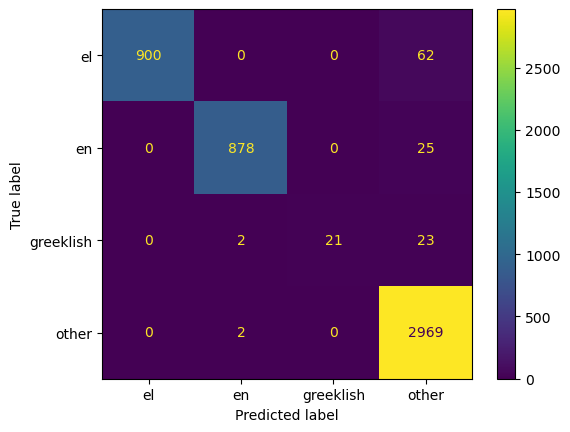

In [49]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
    lr_res = lr.predict(x_test)

get_statistics(y_test, lr_res)

In [50]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=50, 
                                      n_jobs=-1, 
                                      criterion="entropy")
res = cross_val_res(forest_model, x_train, y_train, cv=3)
print(f"Random Forest mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Random Forest mean macro F1: 0.9310, std: 0.9271


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Macro F1: 0.9550203058680564
              precision    recall  f1-score   support

          el       1.00      0.98      0.99       962
          en       0.98      0.99      0.99       903
   greeklish       1.00      0.74      0.85        46
       other       0.99      1.00      0.99      2971

    accuracy                           0.99      4882
   macro avg       0.99      0.93      0.96      4882
weighted avg       0.99      0.99      0.99      4882



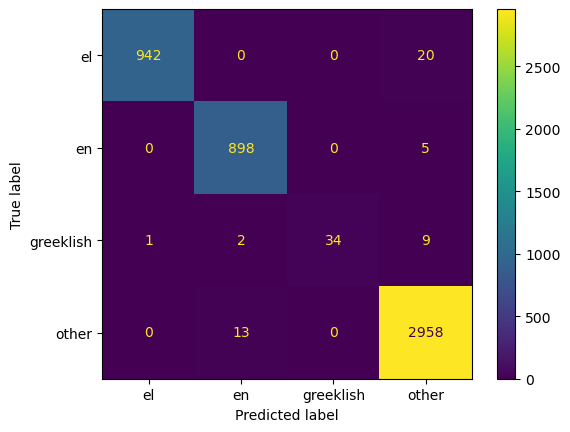

In [51]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=100, 
                                      n_jobs=-1, 
                                      criterion="entropy", 
                                      verbose=1).fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
get_statistics(y_test, forest_pred)

### Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=50)
res = cross_val_res(ada_model, x_train, y_train, cv=3)
print(f"AdaBoost mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

AdaBoost mean macro F1: 0.8740, std: 0.8428


Macro F1: 0.9058508568145229
              precision    recall  f1-score   support

          el       0.99      0.88      0.93       962
          en       0.97      0.94      0.95       903
   greeklish       0.82      0.72      0.77        46
       other       0.95      0.99      0.97      2971

    accuracy                           0.96      4882
   macro avg       0.93      0.88      0.91      4882
weighted avg       0.96      0.96      0.96      4882



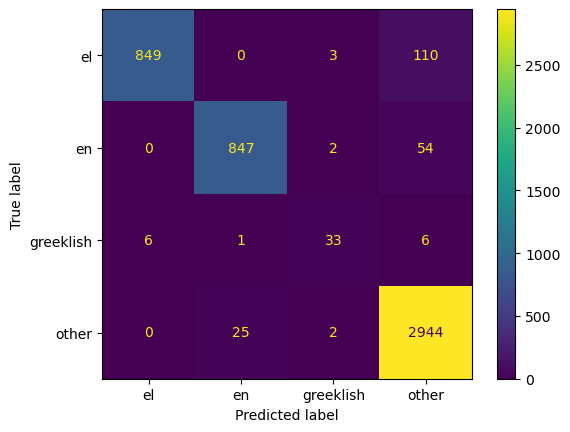

In [53]:
ada_model = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
get_statistics(y_test, ada_pred)

In [54]:
missed = y_test != ada_pred
pd.DataFrame({"predicted": ada_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted actual                                               text
9932         en  other  M·∫∑t kh√°c, c√≥ nh·ªØng tr√°ch nhi·ªám c·∫ßn ph·∫£i gi·ªØ l·∫°...
8421      other     en     This thing is EXACTLY what is described, 10/10
1350      other     el  Œó œÄœÑŒøŒªŒµŒºŒ±œäŒ∫œå ŒµœÄŒøœáŒÆ Œ≠œÜœÑŒ±œÉŒµ œÉœÑŒø œÑŒ≠ŒªŒøœÇ œÑŒ∑œÇ ŒºŒµ œÑŒ∑ŒΩ...
1444      other     el                          Œ§ŒØœÄŒøœÑŒ± , Œ∫œÖœÅŒØŒ± Œ∫Œ¨Œ≤ŒµŒΩœÑŒπœÇ ;
3537      other     el  Œó Œ£œÖŒºŒºŒ±œáŒØŒ± Œ¶œÅŒ¨ŒΩŒ∫Œø-Œ†ŒπŒµŒºŒøŒΩœÑŒ≠Œ∂Œ± œÄŒ±ŒØœÅŒΩŒµŒπ œÑŒ∑ ŒªŒøŒºŒ≤Œ±œÅ...
...         ...    ...                                                ...
22819        en  other  Oh yeah it ' s amazing how mboga kilogram will...
2208      other     en  A rubbish I bought this time. Absobuly hate th...
5217      other     el          ŒõŒµŒπœÑŒøœÖœÅŒ≥ŒπŒ∫ŒÆ Œ¥ŒπŒ±œÉœçŒΩŒ¥ŒµœÉŒ∑ œÉœÖœÉœÑŒ∑ŒºŒ¨œÑœâŒΩ ( osi )
6105      other     el                                  Œ£œáŒµŒ¥œåŒΩ œÄŒøœÑŒ≠ . ' '
251       other     en  Don't waste your money, a LED light bulbs are ...

[209 rows x 3 columns]

In [55]:
missed = y_test != forest_pred
pd.DataFrame({"predicted": forest_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted     actual  \
1444        other         el   
2605        other         el   
15081          en      other   
23944          en      other   
1865        other         en   
22549          en      other   
3100720     other  greeklish   
10019          en      other   
3101189     other  greeklish   
2995730     other  greeklish   
2903471     other  greeklish   
10127          en      other   
2434        other         el   
15429          en      other   
4376        other         el   
4903        other         el   
399         other         en   
22937          en      other   
3107924     other  greeklish   
4026        other         el   
1929        other         en   
2943        other         el   
397         other         el   
2954        other         el   
2569380        en  greeklish   
259         other         el   
2919719        en  greeklish   
4089        other         el   
2486513     other  greeklish   
2733        other         el   
2579        other         en   
4193        other         el   
2978543        el  greeklish   
2300719     other  greeklish   
21943          en      other   
1514        other         el   
2696563     other  greeklish   
3153672     other  greeklish   
6241        other         en   
14514          en      other   
2358        other         el   
21026          en      other   
3200        other         el   
3595        other         el   
19737          en      other   
2168        other         el   
10865          en      other   
22819          en      other   
5217        other         el   
6105        other         el   

                                                      text  
1444                             Œ§ŒØœÄŒøœÑŒ± , Œ∫œÖœÅŒØŒ± Œ∫Œ¨Œ≤ŒµŒΩœÑŒπœÇ ;  
2605                        Œ•œÄœåŒ≥ŒµŒπŒµœÇ Œ¥ŒµŒæŒ±ŒºŒµŒΩŒ≠œÇ Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑œÇ  
15081              We will meet you back hapa usiku wa leo  
23944         I ' m amazing napenda hizo movie i really do  
1865                                 WERE IMPROPERLY SEWEN  
22549          you wanted my uncle , david arnold hanson .  
3100720         discord? giati in game den vriskw kanenan!  
10019    No she didn ' t even take the gunia huyu ni yu...  
3101189                             kane upomoni tha vreis  
2995730                                       ....deleted.  
2903471  oti leei o titlos paides grapste edo apo kato ...  
10127                It seems we can ' t help sisi wenyewe  
2434                                  Œ¶Œ±Œ≥Œ∑œÑœå : 4 Œ±œÉœÑŒ≠œÅŒπŒ± .  
15429    Which means if you have a good year winning on...  
4376                                    ŒöŒ±œÑŒ¨ŒªŒªŒ∑ŒªŒ∑ Œ∑ŒªŒπŒ∫ŒØŒ± .  
4903                                    ŒîŒπŒµŒæŒÆœáŒ∏Œ∑ œÉŒπœâœÄŒ∑ŒªŒ¨ .  
399                           REPLACED PART IN FAN EXACTLY  
22937                            Mƒô≈ºczyzna wiƒÖ≈ºe sw√≥j but.  
3107924                                    K r o b a i n h  
4026       Œó Œ±œÄŒøŒπŒ∫ŒØŒ± œÉŒπŒ≥Œ¨ œÉŒπŒ≥Œ¨ Œ≠Œ≥ŒπŒΩŒµ Œ∫Œ±ŒªœçœÑŒµœÅŒ± ŒøœÅŒ≥Œ±ŒΩœâŒºŒ≠ŒΩŒ∑ .  
1929        FAULTY - All stopped functioning within 1 week  
2943                                           Œ§œÅŒµŒªœå , Œµ ;  
397                                    2 ŒΩŒøŒºŒπŒ∫Œ≠œÇ œÖœÄŒ∑œÅŒµœÉŒØŒµœÇ  
2954                                        ŒëŒ∫œåŒºŒ± ŒøŒ¥Œ∑Œ≥ŒµŒØ .  
2569380          den ntrepese na les for the alliance rly?  
259                              ŒïŒ∏ŒΩŒπŒ∫œå ŒäŒ¥œÅœÖŒºŒ± ŒïœÄŒπœÉœÑŒ∑ŒºœéŒΩ .  
2919719  Originally Posted by KOST91\n\nYparxei ellhnik...  
4089                             Œâ Œ¥œçŒø Œ≥ŒΩœâœÉœÑŒøŒØ Œ±œÄŒøœÉœÑŒ¨œÑŒµœÇ .  
2486513                       8a apanthsei kaneis ti fasi?  
2733                                       Œ£ ' ŒµœÖœáŒ±œÅŒπœÉœÑœé .  
2579            Controversial things about banking system.  
4193     6 % œâœÇ Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± Œ±œÄœÅŒøœÉŒ¥ŒπœåœÅŒπœÉœÑŒø ŒºœåŒΩŒπŒºœâŒΩ Œ¥œÅŒ¨œÉŒµœâ...  
2978543                                  horde i alliance?  
2300719                         moloxa to nam

### Hyperparameter tuning

In [66]:
estimators = []
scores = []

for n_estimators in tqdm([int(x) for x in np.linspace(start = 15, stop = 600, num = 10)]):
    estim = RandomForestClassifier(n_estimators=n_estimators, 
                                  n_jobs=-1, 
                                  criterion="entropy").fit(x_train, y_train)
    score = f1_score(y_val, estim.predict(x_val), average='macro', zero_division=0)

    estimators.append(estim)
    scores.append(score)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [06:54<00:00, 41.42s/it]


In [67]:
best_model = estimators[np.argmax(scores)]

print(f"Best model {best_model} with macro F1 score of {max(scores)}")

Best model RandomForestClassifier(criterion='entropy', n_estimators=600, n_jobs=-1) with macro F1 score of 0.9659623525862466


In [56]:
print(f"Notebook executed in {int((time()-start)// 60)} minutes and {(time()-start) % 60:.1f} seconds")

Notebook executed in 12 minutes and 15.8 seconds
